In [44]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
df_bookmark = pd.read_csv('bookmark_events_subset.csv')
df_buy = pd.read_csv('buy_events_subset.csv')
df_cards = pd.read_csv('cards.csv')
df_discover = pd.read_csv('discover_events_subset.csv')
df_user = pd.read_csv('users_subset.csv')

In [8]:
def preview(df):
    print(df.head())
    print()
    print(df.info())
    print()
    print(df.shape)
    print()
    print(df.describe())

In [9]:
preview(df_bookmark)

   user_id  card_id                  created_at                  updated_at
0       36       19  2015-09-23 00:20:27.682234  2015-09-23 00:20:27.682234
1       36       16  2016-04-26 18:23:16.290537  2016-04-26 18:23:16.290537
2       36       18  2017-01-09 15:44:42.961901  2017-01-09 15:44:42.961901
3      735       10  2017-07-27 14:21:56.235597  2017-07-27 14:21:56.235597
4     1355        7  2018-05-08 01:51:26.213229  2018-05-08 01:51:26.213229

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315921 entries, 0 to 315920
Data columns (total 4 columns):
user_id       315921 non-null int64
card_id       315921 non-null int64
created_at    315921 non-null object
updated_at    315921 non-null object
dtypes: int64(2), object(2)
memory usage: 9.6+ MB
None

(315921, 4)

            user_id        card_id
count  3.159210e+05  315921.000000
mean   2.664269e+06      39.603898
std    1.227949e+06      26.942341
min    3.600000e+01       1.000000
25%    1.651974e+06      17.000000
50%    2

In [10]:
preview(df_buy)

   card_id  user_id                  created_at  value
0        1       36  2015-11-21 14:21:22.081954  40.00
1        1       36  2016-10-22 03:29:54.701271  21.08
2        2       36  2015-12-02 16:33:39.096847  40.00
3        2       36  2015-12-04 14:30:40.441108  50.00
4        2       36  2015-12-14 16:53:20.991915  50.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907201 entries, 0 to 1907200
Data columns (total 4 columns):
card_id       int64
user_id       int64
created_at    object
value         float64
dtypes: float64(1), int64(2), object(1)
memory usage: 58.2+ MB
None

(1907201, 4)

            card_id       user_id         value
count  1.907201e+06  1.907201e+06  1.907201e+06
mean   2.490523e+01  2.069440e+06  2.120448e+01
std    2.118815e+01  1.181371e+06  1.239314e+02
min    1.000000e+00  3.600000e+01  1.000000e-02
25%    1.000000e+01  1.089182e+06  5.000000e+00
50%    1.800000e+01  1.953796e+06  5.040000e+00
75%    3.800000e+01  3.050221e+06  1.500000e+01
max    

In [11]:
df_cards.head()

,id,name,description,underlying_security,ticker_symbol,last_price,dividend_rate_percent,expense_ratio_percent,one_day_change_percent,year_to_date_change_percent,...,last_refresh,long_description,cusip,start_of_year_price,start_of_year_price_year,learn_post_id,inception_price,tags,investment_type,color_code
0,50,General Electric,The storied digital industrial conglomerate co...,General Electric Company,GE,12.95,4.57,0.00,-1.30,-25.79,...,2018-07-23 14:15:39.000000,"Co-founded in 1892 by inventor Thomas Edison, ...",369604103,17.45,2018,NaN,NaN,['General Electric'],STOCK,1e60ae
1,83,Match the Market,This low-cost foundation fund tracks the S&P 5...,iShares Core S&P 500 ETF,IVV,281.46,1.80,0.04,-0.06,5.16,...,2018-07-23 14:15:39.000000,This bundle of America's powerhouse companies ...,464287200,267.64,2018,NaN,NaN,['Match the Market'],ETF,NaN
2,53,Netflix,This massive production studio streams origina...,"Netflix, Inc.",NFLX,359.09,0.00,0.00,-0.54,87.07,...,2018-07-23 14:15:40.000000,What began as a mail-order DVD company is now ...,64110L106,191.96,2018,NaN,1.21,['Netflix'],STOCK,e50914
3,91,JPMorgan,One of the oldest financial institutions in th...,JPMorgan Chase & Co,JPM,112.60,2.01,0.00,1.19,6.38,...,2018-07-23 14:15:39.000000,200 years of company history and a presence in...,46625H100,105.85,2018,NaN,4.44,[''],STOCK,6d6e71
4,68,Union Pacific,This stalwart powers global supply chains with...,Union Pacific Corporation,UNP,143.83,1.93,0.00,1.71,7.83,...,2018-07-23 14:15:35.000000,Union Pacific traces its origins back to the 1...,907818108,133.39,2018,NaN,NaN,['Union Pacific'],STOCK,004990


In [12]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 25 columns):
id                             117 non-null int64
name                           117 non-null object
description                    117 non-null object
underlying_security            117 non-null object
ticker_symbol                  117 non-null object
last_price                     117 non-null float64
dividend_rate_percent          117 non-null float64
expense_ratio_percent          114 non-null float64
one_day_change_percent         117 non-null float64
year_to_date_change_percent    117 non-null float64
created_at                     117 non-null object
updated_at                     117 non-null object
risk_level                     117 non-null int64
fund_url                       117 non-null object
inception                      117 non-null object
last_refresh                   117 non-null object
long_description               117 non-null object
cusip                    

In [13]:
df_cards.shape

(117, 25)

In [14]:
preview(df_discover)

                                   uuid                name  \
0  291e2c0f-9333-4258-8318-739567c77fc3  Do the Right Thing   
1  124c7cbd-ae81-4ddd-9155-ee585d3c616a             Walmart   
2  291e2c0f-9333-4258-8318-739567c77fc3      Women Who Lead   
3  291e2c0f-9333-4258-8318-739567c77fc3        Moderate Mix   
4  291e2c0f-9333-4258-8318-739567c77fc3        Public Works   

              datetime  
0  2018-03-30 20:00:03  
1  2018-03-30 20:00:06  
2  2018-03-30 20:00:12  
3  2018-03-30 20:00:23  
4  2018-03-30 20:00:43  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973285 entries, 0 to 973284
Data columns (total 3 columns):
uuid        973285 non-null object
name        973285 non-null object
datetime    973285 non-null object
dtypes: object(3)
memory usage: 22.3+ MB
None

(973285, 3)

                                        uuid                name  \
count                                 973285              973285   
unique                                 52536               

In [15]:
preview(df_user)

   user_id  federal_tax_bracket_percent employment_status  liquidity_needs  \
0       36                         28.0          EMPLOYED              0.0   
1      492                         28.0          EMPLOYED              0.5   
2      735                         15.0           STUDENT              1.0   
3     1355                         28.0          EMPLOYED              0.0   
4     1673                         25.0          EMPLOYED              0.5   

   total_net_worth_range  age                                  uuid  \
0                    1.0   40  3cfff967-ba7c-4f35-9165-e6beca370290   
1                    1.0   36  3ef66efe-1604-4443-a315-508aee0b82fb   
2                    0.0   32  15d40f88-ad0d-4614-a358-c157de9cfeab   
3                    0.5   33  30d621b1-04e7-495e-bb4f-4471949ce915   
4                    0.5   65  40fd8ce4-5c45-4faa-a96e-04869ba5b7c9   

   risk_level  
0           3  
1           2  
2           2  
3           3  
4           2  

<class 

### Q1: Which 5 stocks have the highest volume of purchases?

In [16]:
df_vol = df_buy.groupby('card_id')['value'].agg(sum).sort_values(ascending = False).reset_index(drop = False)
df_vol.rename(columns={'value':'volume'}, inplace = True)
df_top5_vol = df_vol.head(5)

In [17]:
df_top5_vol = df_top5_vol.merge(df_cards[['id','name']], how = 'left', left_on = 'card_id', right_on = 'id')
df_top5_vol.drop(axis = 1, columns=['id'], inplace = True)
df_top5_vol.sort_values('volume', ascending= False, inplace= True)
df_top5_vol.head()

,card_id,volume,name
0,13,2149275.36,Blue Chips
1,4,2107367.47,Roll with Buffett
2,11,2080428.26,Defending America
3,18,2030696.78,Delicious Dividends
4,2,1770328.24,Moderate Mix


### Q2: Which 5 stocks have been growing the fastest in purchase volume? 

- There are 2 ways of defining growth:
    
    1. average incremental percent change 
    2. slope of linear model against time

In [22]:
# transform string to datetime object
df_buy['created_at'] = pd.to_datetime(df_buy['created_at'])

In [23]:
# preview mastercard volume
df_buy[df_buy['card_id'] == 83].head(20)

,card_id,user_id,created_at,value
1648,83,2287,2018-07-12 22:08:59.351741,13.00
2808,83,8471,2018-04-28 21:27:57.592101,5.00
5056,83,15575,2018-04-30 19:14:21.366750,5.00
7214,83,49118,2018-06-07 19:41:19.435139,5.00
7215,83,49118,2018-06-14 15:05:55.572422,5.00
7216,83,49118,2018-06-21 15:10:13.857048,5.00
7217,83,49118,2018-06-28 15:07:30.543615,5.00
7218,83,49118,2018-07-05 15:39:35.443756,5.00
7219,83,49118,2018-07-12 15:11:23.207447,5.00
7220,83,49118,2018-07-19 15:15:38.978370,5.00


In [25]:
# transform datetime to date and calculate daily volume
df_buy['date'] = df_buy['created_at'].apply(lambda x: x.toordinal())
buy_daily = df_buy.groupby(['card_id','date'])['value'].agg(sum)
df_buy_daily = buy_daily.reset_index(drop = False)
df_buy_daily.rename(columns={'value':'daily_volume'}, inplace = True)
# transform ordinal date to datetime
df_buy_daily['date'] = df_buy_daily['date'].apply(lambda x: dt.datetime.fromordinal(x))

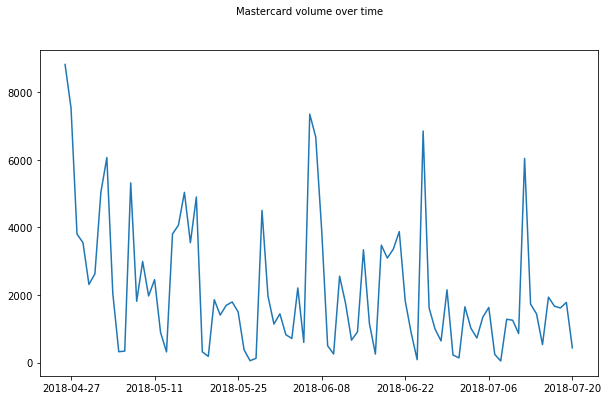

In [45]:
# plot of mastercard volume through time
plt.clf()
plt.figure(figsize = (10,6))
plt.suptitle('Mastercard volume over time', fontsize = 10)
# distribution of lag with raw data
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 83]['date'], df_buy_daily[df_buy_daily['card_id'] == 83]['daily_volume'])
plt.show()

In [47]:
# function to calculate average incremental percent change
def increment(df, df_cards):
    cards = df['card_id'].unique()
    result = []
    for i in cards:
        df_temp = df[df['card_id'] == i].sort_values('date', ascending = True)
        df_temp['pct_change'] = df_temp['daily_volume'].pct_change()
        result.append(df_temp['pct_change'].mean())
    df_raw = pd.DataFrame({'id':cards, 'avg_pct_change':result})
    df_output = df_raw.merge(df_cards[['id','name']], how = 'left', on = 'id')
    df_output.sort_values('avg_pct_change', ascending = False, inplace = True)
    return df_output

In [48]:
df_top_pct_change = increment(df_buy_daily, df_cards)
df_top_pct_change.head()

,id,avg_pct_change,name
18,19,35.561417,On Cloud Nine
49,50,12.753683,General Electric
83,84,10.418437,JD.com
95,96,8.554024,General Dynamics
112,113,8.014721,Bristol-Myers Squibb


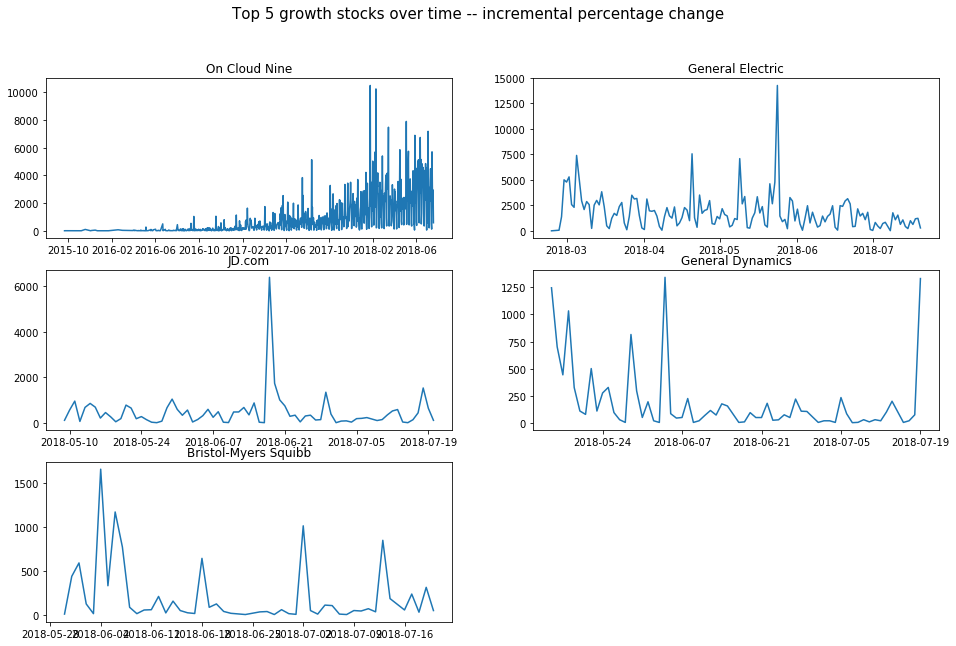

In [64]:
# plot top 5 growth stocks
plt.clf()
plt.figure(figsize = (16,10))
plt.suptitle('Top 5 growth stocks over time -- incremental percentage change', fontsize = 15)
# On Cloud Nine over time
plt.subplot(3,2,1)
plt.title('On Cloud Nine')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 19]['date'], df_buy_daily[df_buy_daily['card_id'] == 19]['daily_volume'])
# General Electric over time
plt.subplot(3,2,2)
plt.title('General Electric')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 50]['date'], df_buy_daily[df_buy_daily['card_id'] == 50]['daily_volume'])
# JD.com over time
plt.subplot(3,2,3)
plt.title('JD.com')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 84]['date'], df_buy_daily[df_buy_daily['card_id'] == 84]['daily_volume'])
# General Dynamics over time
plt.subplot(3,2,4)
plt.title('General Dynamics')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 96]['date'], df_buy_daily[df_buy_daily['card_id'] == 96]['daily_volume'])
# Bristol-Myers Squibb over time
plt.subplot(3,2,5)
plt.title('Bristol-Myers Squibb')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 113]['date'], df_buy_daily[df_buy_daily['card_id'] == 113]['daily_volume'])
plt.show()

Before fitting linear model, we need to clean the data.

To start with, the time in df_buy is string. We need to change it to datetime object and then calculate the difference.

In [50]:
# function to calculate slope of linear model
def linear(df, df_cards):
    cards = df['card_id'].unique()
    result = []
    for i in cards:
        df_temp = df[df['card_id'] == i].sort_values('date', ascending = True)
        reg = linear_model.LinearRegression()
        reg.fit(df_temp[['date']], df_temp[['daily_volume']])
        result.append(reg.coef_[0][0])
    df_raw = pd.DataFrame({'id':cards, 'slope':result})
    df_output = df_raw.merge(df_cards[['id','name']], how = 'left', on = 'id')
    df_output.sort_values('slope', ascending = False, inplace = True)
    return df_output

In [51]:
df_top_slope = linear(df_buy_daily, df_cards)
df_top_slope.head()

,id,slope,name
52,53,1.192962e-12,Netflix
45,46,2.845033e-13,Amazon
43,44,2.415560e-13,Long-Term Mix
6,7,9.356483e-14,Internet Titans
10,11,9.136479e-14,Defending America


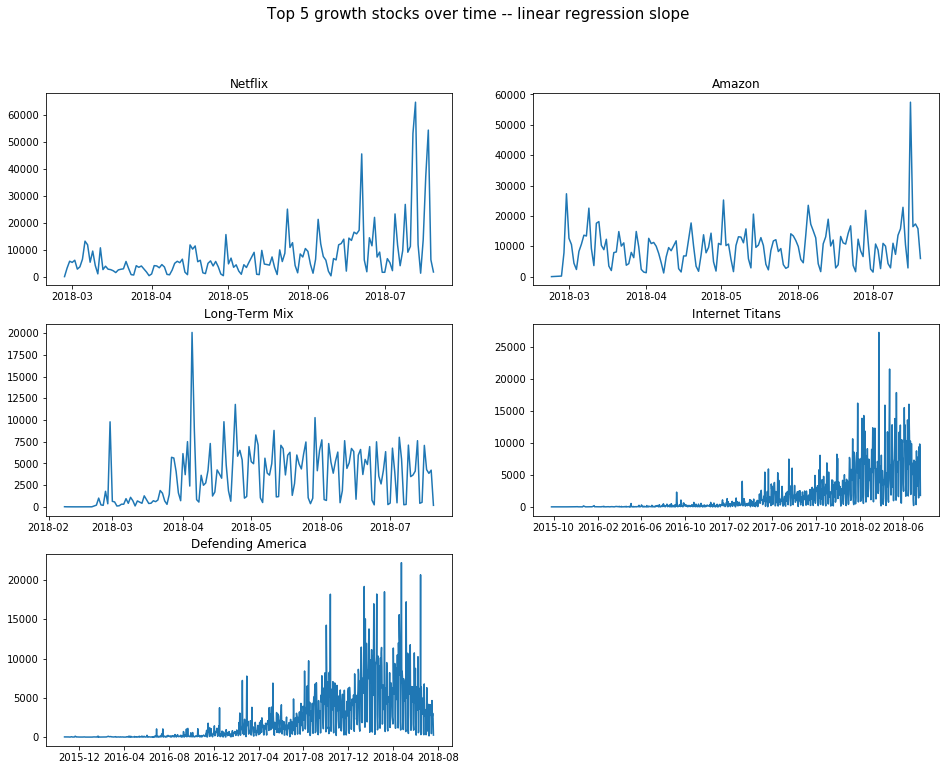

In [63]:
# plot top 5 growth stocks
plt.clf()
plt.figure(figsize = (16,12))
plt.suptitle('Top 5 growth stocks over time -- linear regression slope', fontsize = 15)
# Netflix over time
plt.subplot(3,2,1)
plt.title('Netflix')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 53]['date'], df_buy_daily[df_buy_daily['card_id'] == 53]['daily_volume'])
# Amazon over time
plt.subplot(3,2,2)
plt.title('Amazon')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 46]['date'], df_buy_daily[df_buy_daily['card_id'] == 46]['daily_volume'])
# Long-Term Mix over time
plt.subplot(3,2,3)
plt.title('Long-Term Mix')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 44]['date'], df_buy_daily[df_buy_daily['card_id'] == 44]['daily_volume'])
# Internet Titans over time
plt.subplot(3,2,4)
plt.title('Internet Titans')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 7]['date'], df_buy_daily[df_buy_daily['card_id'] == 7]['daily_volume'])
# Defending America over time
plt.subplot(3,2,5)
plt.title('Defending America')
plt.plot(df_buy_daily[df_buy_daily['card_id'] == 11]['date'], df_buy_daily[df_buy_daily['card_id'] == 11]['daily_volume'])
plt.show()

### Q3: Based on the data, what do you think drives a user to make a purchase? What would you recommend to the business to increase user purchases? What other data would you want?

1. data cleaning
    1. dataframe of user total volume per card
2. feature engineering
    - list of features:
        - 
3. users purchase total volume regression analysis with random forest


In [65]:
# dataframe of user total volume per card
buy_users = df_buy.groupby(['user_id', 'card_id'])['value'].agg(sum)
df_buy_users = buy_users.reset_index(drop = False)
df_buy_users.rename(columns={'value':'volume'}, inplace = True)